In [95]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [96]:
directory = "C:\\Users\\Ricky\\Documents\\GitHub\\Thesis\\Data Generated\\Dilution_models_summary.csv"
df = pd.read_csv(directory)
df

,Cycle,Average Price,Volatility,Speculator Proportion,Model
0,0,100.033509,3.415595,50.0,5.0
1,1,98.118191,6.682738,55.0,5.0
2,2,91.878819,12.720370,60.0,5.0
3,3,86.763709,18.992150,65.0,5.0
4,4,78.908341,23.394830,70.0,5.0
5,5,59.805770,26.883466,75.0,5.0
6,6,39.162362,21.966965,80.0,5.0
7,7,18.599020,11.425795,85.0,5.0
8,8,5.651301,3.842429,90.0,5.0
9,9,1.791572,0.864653,95.0,5.0


In [97]:
df_5_percent = df[df['Model'] == 5.0].reset_index(drop=True)
df_2_5_percent = df[df['Model'] == 2.5].reset_index(drop=True)
df_1_percent = df[df['Model'] == 1.0].reset_index(drop=True)

# Figure 28

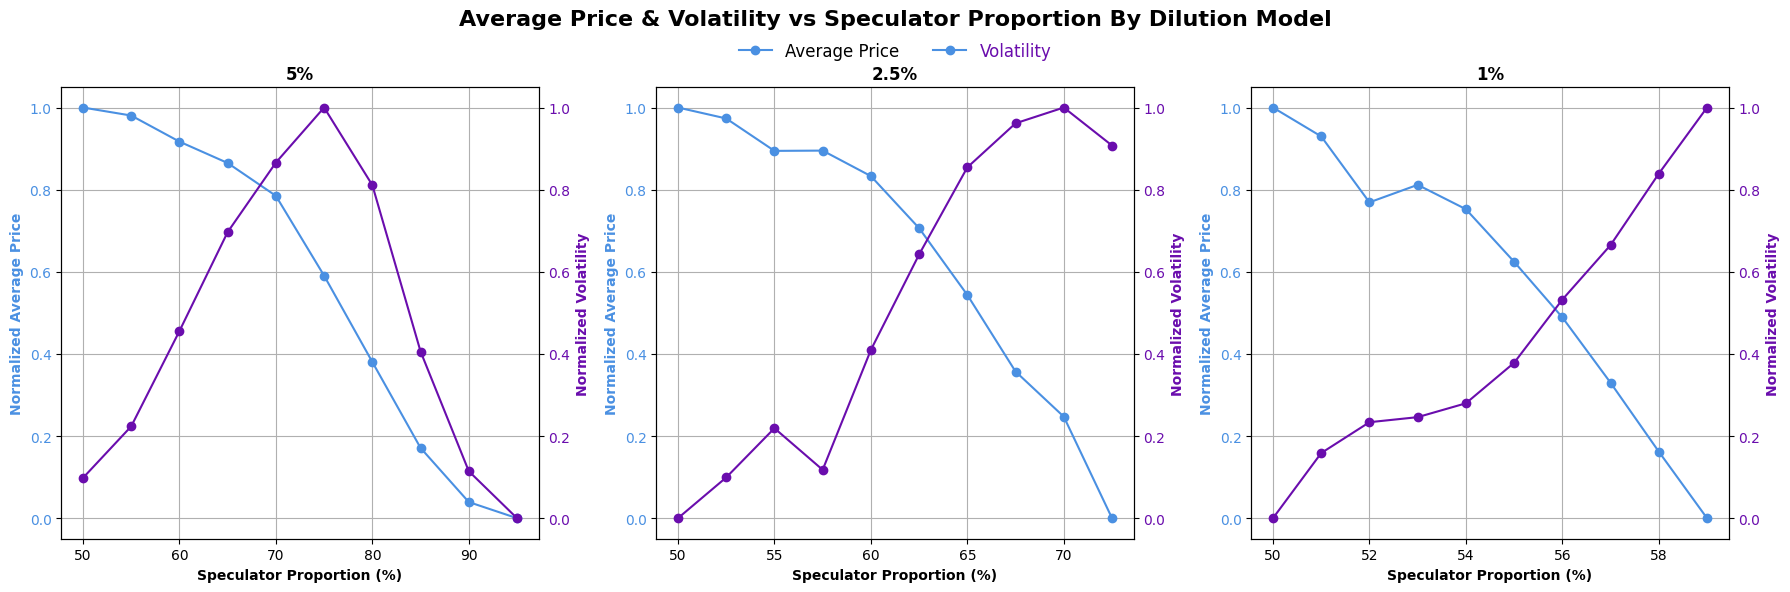

In [98]:
scaler = MinMaxScaler()
df_5_percent[['Average Price', 'Volatility']] = scaler.fit_transform(
    df_5_percent[['Average Price', 'Volatility']]
)
df_2_5_percent[['Average Price', 'Volatility']] = scaler.fit_transform(
    df_2_5_percent[['Average Price', 'Volatility']]
)
df_1_percent[['Average Price', 'Volatility']] = scaler.fit_transform(
    df_1_percent[['Average Price', 'Volatility']]
)

fig, axs = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Average Price & Volatility vs Speculator Proportion By Dilution Model', fontsize=16, fontweight='bold')

axs[0].plot(df_5_percent["Speculator Proportion"], df_5_percent["Average Price"], marker='o', color='#4A90E2')
axs[0].set_title('5%', fontweight='bold')
axs[0].set_xlabel('Speculator Proportion (%)', fontweight='bold')
axs[0].set_ylabel('Normalized Average Price', color='#4A90E2', fontweight='bold')
axs[0].tick_params(axis='y', labelcolor='#4A90E2')

ax2 = axs[0].twinx()
ax2.plot(df_5_percent["Speculator Proportion"], df_5_percent["Volatility"], marker='o', color='#6A0DAD')
ax2.set_ylabel('Normalized Volatility', color='#6A0DAD', fontweight='bold')
ax2.tick_params(axis='y', labelcolor='#6A0DAD')
axs[0].grid()

axs[1].plot(df_2_5_percent["Speculator Proportion"], df_2_5_percent["Average Price"], marker='o', color='#4A90E2')
axs[1].set_title('2.5%', fontweight='bold')
axs[1].set_xlabel('Speculator Proportion (%)', fontweight='bold')
axs[1].set_ylabel('Normalized Average Price', color='#4A90E2', fontweight='bold')
axs[1].tick_params(axis='y', labelcolor='#4A90E2')

ax2 = axs[1].twinx()
ax2.plot(df_2_5_percent["Speculator Proportion"], df_2_5_percent["Volatility"], marker='o', color='#6A0DAD')
ax2.set_ylabel('Normalized Volatility', color='#6A0DAD', fontweight='bold')
ax2.tick_params(axis='y', labelcolor='#6A0DAD')
axs[1].grid()

axs[2].plot(df_1_percent["Speculator Proportion"], df_1_percent["Average Price"], marker='o', color='#4A90E2')
axs[2].set_title('1%', fontweight='bold')
axs[2].set_xlabel('Speculator Proportion (%)', fontweight='bold')
axs[2].set_ylabel('Normalized Average Price', color='#4A90E2', fontweight='bold')
axs[2].tick_params(axis='y', labelcolor='#4A90E2')

ax2 = axs[2].twinx()
ax2.plot(df_1_percent["Speculator Proportion"], df_1_percent["Volatility"], marker='o', color='#6A0DAD')
ax2.set_ylabel('Normalized Volatility', color='#6A0DAD', fontweight='bold')
ax2.tick_params(axis='y', labelcolor='#6A0DAD')
axs[2].grid()

legend = fig.legend(['Average Price', 'Volatility'], loc='upper center', ncol=2, fontsize=12, frameon=False, bbox_to_anchor=(0.5, 0.95))
for text in legend.get_texts():
    if text.get_text() == 'Volatility':
        text.set_color('#6A0DAD')  

plt.tight_layout(rect=[0, 0, 1, 1.5])  # Adjust the top value as needed
plt.subplots_adjust(top=0.85)  # Adjust top spacing to give room for the main title

plt.show()


# Figure 29

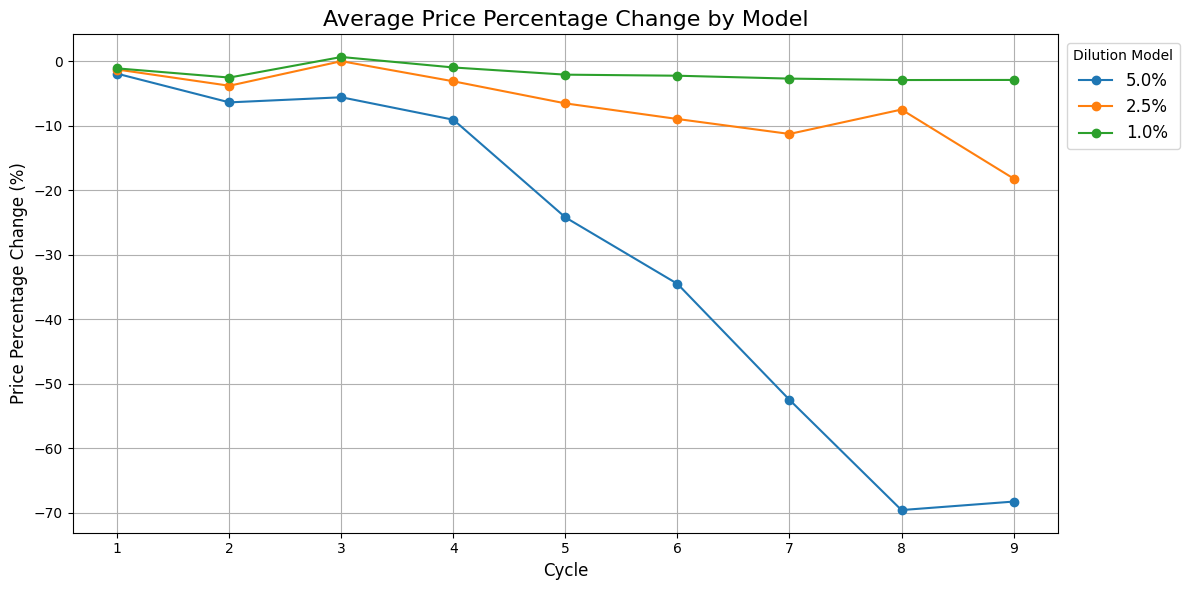

In [99]:
df['Average Price Change'] = df.groupby('Model')['Average Price'].pct_change() * 100

plt.figure(figsize=(12, 6))
plt.title('Average Price Percentage Change by Model', fontsize=16)
plt.xlabel('Cycle', fontsize=12)
plt.ylabel('Price Percentage Change (%)', fontsize=12)

for model in df['Model'].unique():
    model_data = df[df['Model'] == model]
    plt.plot(model_data['Cycle'], model_data['Average Price Change'], marker='o', label=f'{model}%')
plt.legend(title='Dilution Model', fontsize=12, bbox_to_anchor=(1, 1), loc='upper left')
plt.grid()
plt.tight_layout()
plt.show()
